# Simple tile 2 zarr creation using centre positions

**NOTE**: All tiltes have same dimentions, they have been pre stitched and there is no overlap between them. The arrangement of the tiles does not ahve to follow the clasical checkboard structure.

## Loading centre position metadata from CVS file using pandas

In [1]:
import pandas as pd
from pathlib import Path

In [2]:
csv_p = Path(r"./data/tile_centre.csv")
df = pd.read_csv(csv_p, header=None, names=["centre_x", "centre_y"])
df

,centre_x,centre_y
0,51,51
1,132,51
2,213,51
3,100,132
4,181,132


In [3]:
n_tiles = len(df.index)
print(f"we found {n_tiles} tiles")
tile_width = 81
print(f"in this example each tile is {tile_width}x{tile_width} pixels")

# because my width is 81 then
min_x = df.min()["centre_x"]-40
min_y = df.min()["centre_y"]-40
max_x = df.max()["centre_x"]+40
max_y = df.max()["centre_y"]+40

total_x = max_x +1
total_y = max_y +1

print(f"image should go from {min_x}, {min_y} to {max_x}, {max_y}")
print(f"This means the full area is {total_x}, {total_y} pixels")

we found 5 tiles
in this example each tile is 81x81 pixels
image should go from 11, 11 to 253, 172
This means the full area is 254, 173 pixels


## Checking tile arrangement as a figure

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

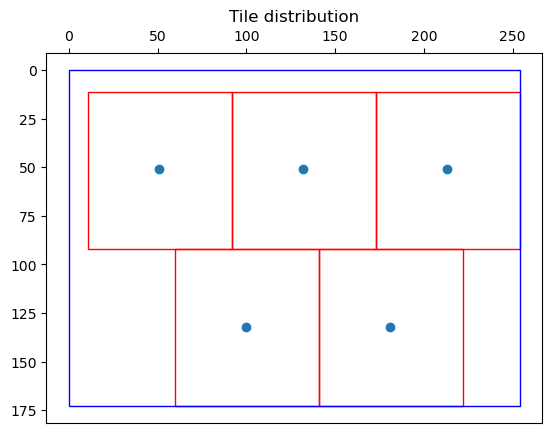

In [5]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.scatter(df["centre_x"].to_numpy(), df["centre_y"].to_numpy())

#add rectangle to plot
for index, row in df.iterrows():
    c_x = row["centre_x"]
    c_y = row["centre_y"]
    ax.add_patch(Rectangle((c_x-40, c_y-40), tile_width, tile_width,
             edgecolor = 'red',
             fill=False))

ax.add_patch(Rectangle((0, 0), total_x, total_y,
             edgecolor = 'blue',
             fill=False))

# axis as in image
ax.set_ylim(ax.get_ylim()[::-1])  
ax.xaxis.tick_top() 
ax.yaxis.tick_left()  

#display plot
plt.title("Tile distribution")
plt.show()

## Init ZARR array filled with zeros

In [6]:
import zarr
import skimage.io as skio

In [7]:
z = zarr.zeros((total_y, total_x))
store = zarr.DirectoryStore('./data/example01.zarr')
z = zarr.create(store=store, overwrite=True, shape=z.shape)

## Dynamically fill in values

In [8]:
# as tiles are 81 x 81 then my delta is 40
tile_d = 40
for tile_idx, row in df.iterrows():
  print(tile_idx)
  tile = skio.imread(f"./data/t0{tile_idx+1}.tif", plugin="tifffile")
  x1 = row["centre_x"]-tile_d
  x2 = row["centre_x"]+tile_d
  y1 = row["centre_y"]-tile_d
  y2 = row["centre_y"]+tile_d
  print(f"Tile {tile_idx+1}  centre: {row['centre_x']}, {row['centre_y']} goes to: x:[{x1}:{x2}], y:[{y1}:{y2}]")
  z[y1:y2+1,x1:x2+1] = tile
  
  

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


0
Tile 1  centre: 51, 51 goes to: x:[11:91], y:[11:91]
1
Tile 2  centre: 132, 51 goes to: x:[92:172], y:[11:91]
2
Tile 3  centre: 213, 51 goes to: x:[173:253], y:[11:91]
3
Tile 4  centre: 100, 132 goes to: x:[60:140], y:[92:172]
4
Tile 5  centre: 181, 132 goes to: x:[141:221], y:[92:172]


## Closing remarks

This iamge can be now opened in Napari by drag a drop and using ```napari builtins```